# Notebook - Analisi della qualità del vino 

Il dataset sulla qualità del vino contiene informazioni su varie proprietà fisico-chimiche dei vini. É associato un set di dati alla sua varietà di colore: vino rosso e vino bianco. Ad ogni vino è assegnata un'etichetta riguardante la qualità.

![](http://pasticceriedelite.it/wp-content/uploads/2021/02/rossibianchi.jpg)

### Indice:
1. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#1---Manipolazioni-dei-Dati">Manipolazione dei Dati</a> 
2. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Statistica-Descrittiva-e-Analisi-Esplorativa-tramite-Tecniche-di-Visualizzazione">Analisi Statistica Descrittiva e Visualizzazione</a>  
3. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Machine-learnging">Machine Learning</a>

### Import delle librerie necessarie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

### Caricamento dei dataset <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality" target="_blank">LINK</a>

In [6]:
# utilizzo il separatore ';'
df_white_wine = pd.read_csv('./winequality-white.csv', sep=';')
df_red_wine = pd.read_csv('./winequality-red.csv', sep=';')

## 1 - Manipolazioni dei dati

In [7]:
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
df_red_wine['wine color'] = 'red'   
df_white_wine['wine color'] = 'white'

### Modifica dei dataset aggiungendo la colonna relativa al colore del vino

In [10]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Verifica preliminare di righe e colonna per unire i due dataset

In [12]:
print(df_red_wine.count())
print()
print(df_white_wine.count())

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
wine color              1599
dtype: int64

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
wine color              4898
dtype: int64


***

*I vini rossi sono 1599 mentre i vini bianchi sono 4898. Da una prima analisi notiamo che non ci sono anomalie su valori nulli. Inoltre, hanno le stesse colonne quindi sono concatenabili*

### Concatenamento dei due dataset in un unico dataset (orizzontalmente)

In [9]:
df_wines = pd.concat([df_red_wine, df_white_wine], axis=0)

# mescolamento delle righe (axis = 0), ritorna tutte le righe (frac = 1)
df_wines = df_wines.sample(frac=1, axis=0)

# reset degli indici, elimina la colonna degli indici precedente (drop=true)
# lavora sullo stesso DF (inplace=true)
df_wines.reset_index(inplace=True, drop=True)

# verifichiamo le operazioni
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


***

*Si ottengono 6497 entries con indici che vanno da 0 a 6496*

In [10]:
df_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
6492,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
6493,7.0,0.57,0.02,2.00,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5,red
6494,7.1,0.43,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5,white
6495,6.0,0.31,0.24,3.30,0.041,25.0,143.0,0.99140,3.31,0.44,11.3,6,white
6496,6.3,0.30,0.48,7.40,0.053,34.0,149.0,0.99472,3.18,0.53,9.8,5,white


***

*Notiamo come gli indici vengono resettato in modo predefinito dopo la concatenazione ed il mescolamento*

### Verifica dei valori null sul nuovo dataset

In [11]:
df_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine color              False
dtype: bool

***

*Non ci sono valori mancanti/nulli e tutte le colonne (al netto della colonna descrittive aggiunta: colore) hanno un valore numerico*

### Aggiunta della colonna testuale descrittiva sulla qualità del vino

In [12]:
# verifica valori sulle qualità del vino

print('Possibili valori (in ordine crescente) della qualità del vino:', np.sort(df_wines['quality'].unique()))
print()
print('Minimo valore della qualità del vino:', df_wines['quality'].min())
print()      
print('Massimo valore della qualità del vino:', df_wines['quality'].max())

Possibili valori (in ordine crescente) della qualità del vino: [3 4 5 6 7 8 9]

Minimo valore della qualità del vino: 3

Massimo valore della qualità del vino: 9


in base ai risultati della precedente istruzione si utilizzano tre metodi diversi per aggiungere la nuova colonna e viene confrontata l'efficienza tramite il profiling del tempo

In [14]:
%%timeit
step = (0, 5, 7, 9)
labels = ['low', 'medium', 'high']
df_wines['quality description'] = pd.cut(x = df_wines['quality'], bins = step, labels = labels)

925 µs ± 50.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit
df_wines['quality description'] = df_wines['quality'].apply(
    lambda value: 'low' if value <= 5 
    else 'medium' if value <= 7 
    else 'high')

1 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
newRow=[]
for row in df_wines['quality']:
    if (row<=5):
        val='low'
    elif (row <= 7):
        val='medium'
    else:
        val='high'
    newRow.append(val)
df_wines['quality description'] = newRow

1.22 ms ± 9.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
def getQualityDescription(row):
    if (row<=5):
        val='low'
    elif (row <= 7):
        val='medium'
    else:
        val='high'
    return val    

df_wines['quality description'] = [getQualityDescription(row) for row in df_wines['quality']]

1.4 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
print('controlliamo i risultati:')
print()
print(df_wines[['quality','quality description']][df_wines['quality'] <= 5].head())
print()
print(df_wines[['quality','quality description']][df_wines['quality'].between(6, 7)].head())
print()
print(df_wines[['quality','quality description']][df_wines['quality'] > 7].head())
print()

controlliamo i risultati:

    quality quality description
3         5                 low
9         5                 low
10        4                 low
11        5                 low
18        5                 low

   quality quality description
0        7              medium
1        6              medium
2        6              medium
4        6              medium
5        7              medium

    quality quality description
12        8                high
15        8                high
19        8                high
48        8                high
75        8                high



### Aggiunta della colonna sulle KCAL

L’alcol sviluppa circa 7 calorie per grammo, ed ha un peso specifico di 79 quindi pesa 0,79 kg/litro. Per cui:
un litro di vino con 12° di gradazione contiene 120 ml di alcol, pari a 120×0,79=94,8 grammi. 95×7=**665 kcal**

Lo zucchero nel vino, ha un apporto calorico di 4 kcal/grammo. Quindi un vino con 2.4 g di zucchero contiene 2.4x4=**9.6 kcal**

In totale un litro del vino in questione conterrà 665+9.6=**674.6 kcal** 

<a href="https://www.quattrocalici.it/articoli/quante-calorie-nel-bicchiere-di-vino/" target="_blank">fonte</a>

In [19]:
%timeit df_wines.eval('kcal = (alcohol * 10 * 0.79 * 7) + (`residual sugar` * 4)', inplace=True)

2.46 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
kcal_alcohol = ((df_wines['alcohol'] * 10) * 0.79) * 7
kcal_sugar = df_wines['residual sugar'] * 4
df_wines['kcal'] = round(kcal_alcohol + kcal_sugar)

449 µs ± 9.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%%timeit
kcal_alcohol=[]
for rowVal in df_wines['alcohol']:
    kcal_alcohol.append(rowVal * 10 * 0.79 * 7)  
    
kcal_sugar=[]
for rowVal in df_wines['residual sugar']:
    kcal_sugar.append(rowVal * 4)     
    
newRow=[]
for rowNumer in df_wines.index:
    newRow.append(round(kcal_alcohol[rowNumer] + kcal_sugar[rowNumer]))
    
df_wines['kcal'] = newRow

4.81 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
def calculateKcalAlcohol(rowVal):
    return rowVal * 10 * 0.79 * 7

kcal_alcohol = [calculateKcalAlcohol(rowVal) for rowVal in df_wines['alcohol']]

def calculateKcalSugar(rowVal):
    return rowVal * 4
    
kcal_sugar = [calculateKcalSugar(rowVal) for rowVal in df_wines['residual sugar']]   

def calculateTotalKcal(idx):
    return round(kcal_alcohol[idx] + kcal_sugar[idx])
    
df_wines['kcal'] = [calculateTotalKcal(idx) for idx in df_wines.index]

5.52 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%%timeit
def calculateKcal(alcohol, sugar):
    kcal_alcohol = alcohol * 10 * 0.79 * 7
    kcal_sugar = sugar * 4
    return round(kcal_alcohol + kcal_sugar)

df_wines['kcal'] = df_wines[['alcohol','residual sugar']].apply(lambda val: calculateKcal(val['alcohol'], val['residual sugar']), axis=1)


85.7 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
newRow=[]
for rowNumer in df_wines.index:
    kcal_alcohol = df_wines['alcohol'][rowNumer] * 10 * 0.79 * 7
    kcal_sugar = df_wines['residual sugar'][rowNumer] * 4
    newRow.append(round(kcal_alcohol + kcal_sugar))
                  
df_wines['kcal'] = newRow                  

79 ms ± 634 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color,quality description,kcal
0,7.6,0.210,0.60,2.10,0.046,47.0,165.0,0.99360,3.05,0.54,10.1,7,white,medium,567
1,5.7,0.270,0.32,1.20,0.046,20.0,155.0,0.99340,3.80,0.41,10.2,6,white,medium,569
2,6.7,0.240,0.30,10.20,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,6,white,medium,533
3,7.5,0.290,0.31,8.95,0.055,20.0,151.0,0.99680,3.08,0.54,9.3,5,white,low,550
4,9.2,0.755,0.18,2.20,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6,red,medium,573


## Statistica Descrittiva e Analisi Esplorativa tramite Tecniche di Visualizzazione

### Attributi e proprietà del dataset:

* **Fixed Acidity**: Quantità di acido non volatile (non evapora facilmente) nel vino. La riduzione significativa di questa componente potrebbe portare a vini dal sapore piatto.

* **Volatile Acidity**: Indica la quantità di acido acetico nel vino. Un eccesso di questa compoenente porta a un sapore sgradevole.

* **Citric Acid**: Indica la quantità di acido citrico nel vino. Questa componente presente in piccole quantità conferisce freschezza al vino.

* **Residual Sugar**: Indica la quantità di zucchero rimasta nel vino al termine del processo di fermentazione. É raro trovare vini con meno di 1 grammo/litro.

* **Chlorides**: Indica la quantità di sale nel vino.

* **Free Sulfur Dioxide**: Indica la quantità di anidride solforosa in forma libera (che non si lega). Eccessive quantità potrebbero fornire un odore pungente.

* **Total Sulfur Dioxide**: misura la quantità totale di anidride solforosa nel vino. Questa sostanza chimica funziona come un agente antiossidante e antimicrobico.

* **Density**: Indica la misura della conversione dello zucchero in alcol. Vini più dolci hanno una densità maggiore.

* **PH**: Indica quanto è acido o basico un vino su una scala da 0 (molto acido) a 14 (molto basico). La maggior parte dei vini ha un pH compreso tra 2,9 e 3,9 e sono quindi acidi. La *Fixed Acidity* contribuisce alla variazione di PH dei vini.

* **Sulphates**: Indica la quantità di solfato di potassio nel vino. Sono collegati al processo di fermentazione e influenzano l'aroma e il sapore del vino.

* **Alcohol**: Conversione dello zucchero durante il processo di fermentazione. Indica la gradazione alcolica. Misurato in percentuale.

* **Quality**: Indica la qualità del vino, che va da 1 a 9. Più alto è il valore, migliore è il vino.

* **Wine Color**: Attributo introdotto che indica il colore del vino. Un vino può essere "rosso" o "bianco".

* **Quality Description**: Attributo derivato dall'attributo *Quality*. Raggruppato in tre segmenti qualitativi: low, medium e high. I vini con un punteggio di qualità di 3, 4 e 5 sono di bassa qualità, quelli con un punteggio di 6 e 7 sono di media qualità e quelli superiori a 7 sono di alta qualità.

* **kcal**: Attributo derivato dagli attributi *Alcohol* e *Residual Sugar*. Indica le kcal/l possedute dal vino.

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Media dei valori della qualità del vino: 5.82


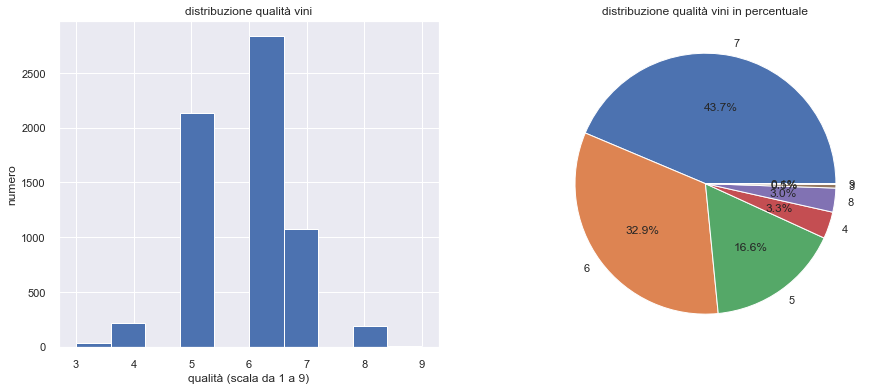

In [64]:
print(df_wines['quality'].value_counts())
print()

print('Media dei valori della qualità del vino:', round(df_wines['quality'].mean(),2))

plt.figure(figsize=(15, 6))

bar = plt.subplot(1,2,1)
plt.title('distribuzione qualità vini')
plt.ylabel('numero')
plt.xlabel('qualità (scala da 1 a 9)')
bar.hist(x = df_wines['quality'])

pie = plt.subplot(1,2,2)
plt.title('distribuzione qualità vini in percentuale')
pie.pie(df_wines['quality'].value_counts(), autopct="%1.1f%%", labels = df_wines['quality'].unique())
plt.show()

In [49]:
pd.set_option("display.max_columns", None)

rs = round(df_wines[df_wines['wine color'] == 'red'].describe(),2)
ws = round(df_wines[df_wines['wine color'] == 'white'].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                                        \
       fixed acidity volatile acidity citric acid residual sugar chlorides   
count        1599.00          1599.00     1599.00        1599.00   1599.00   
mean            8.32             0.53        0.27           2.54      0.09   
std             1.74             0.18        0.19           1.41      0.05   
min             4.60             0.12        0.00           0.90      0.01   
25%             7.10             0.39        0.09           1.90      0.07   
50%             7.90             0.52        0.26           2.20      0.08   
75%             9.20             0.64        0.42           2.60      0.09   
max            15.90             1.58        1.00          15.50      0.61   

                                                                            \
      free sulfur dioxide total sulfur dioxide  density       pH sulphates   
count             1599.00              1599.00  1599.00  1599.00   1599.00   
mean                15.87                46.47     1.00     3.31      0.66   
std                 10.46                32.90     0.00     0.15      0.17   
min                  1.00                 6.00     0.99     2.74      0.33   
25%                  7.00                22.00     1.00     3.21      0.55   
50%                 14.00                38.00     1.00     3.31      0.62   
75%                 21.00                62.00     1.00     3.40      0.73   
max                 72.00               289.00     1.00     4.01      2.00   

                                 White Wine Stats                   \
       alcohol  quality     kcal    fixed acidity volatile acidity   
count  1599.00  1599.00  1599.00          4898.00          4898.00   
mean     10.42     5.64   586.57             6.85             0.28   
std       1.07     0.81    59.44             0.84             0.10   
min       8.40     3.00   472.00             3.80             0.08   
25%       9.50     5.00   536.00             6.30             0.21   
50%      10.20     6.00   572.00             6.80             0.26   
75%      11.10     6.00   623.00             7.30             0.32   
max      14.90     8.00   854.00            14.20             1.10   

                                                                \
      citric acid residual sugar chlorides free sulfur dioxide   
count     4898.00        4898.00   4898.00             4898.00   
mean         0.33           6.39      0.05               35.31   
std          0.12           5.07      0.02               17.01   
min          0.00           0.60      0.01                2.00   
25%          0.27           1.70      0.04               23.00   
50%          0.32           5.20      0.04               34.00   
75%          0.39           9.90      0.05               46.00   
max          1.66          65.80      0.35              289.00   

                                                                          \
      total sulfur dioxide  density       pH sulphates  alcohol  quality   
count              4898.00  4898.00  4898.00   4898.00  4898.00  4898.00   
mean                138.36     0.99     3.19      0.49    10.51     5.88   
std                  42.50     0.00     0.15      0.11     1.23     0.89   
min                   9.00     0.99     2.72      0.22     8.00     3.00   
25%                 108.00     0.99     3.09      0.41     9.50     5.00   
50%                 134.00     0.99     3.18      0.47    10.40     6.00   
75%                 167.00     1.00     3.28      0.55    11.40     6.00   
max                 440.00     1.04     3.82      1.08    14.20     9.00   

                
          kcal  
count  4898.00  
mean    607.01  
std      61.64  
min     446.00  
25%     558.00  
50%     594.00  
75%     644.00  
max     910.00

In [66]:
pd.set_option("display.max_columns", None)

ls = round(df_wines[df_wines['quality description'] == 'low'].describe(),2)
ms = round(df_wines[df_wines['quality description'] == 'medium'].describe(),2)
hs = round(df_wines[df_wines['quality description'] == 'high'].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                                        \
         fixed acidity volatile acidity citric acid residual sugar chlorides   
count          2384.00          2384.00     2384.00        2384.00   2384.00   
mean              7.33             0.40        0.30           5.65      0.06   
std               1.27             0.19        0.16           4.92      0.04   
min               4.20             0.10        0.00           0.60      0.01   
25%               6.50             0.26        0.21           1.80      0.04   
50%               7.10             0.34        0.30           2.90      0.05   
75%               7.80             0.50        0.40           8.52      0.08   
max              15.90             1.58        1.00          23.50      0.61   

                                                                            \
      free sulfur dioxide total sulfur dioxide  density       pH sulphates   
count             2384.00              2384.00  2384.00  2384.00   2384.00   
mean                29.48               119.28     1.00     3.21      0.52   
std                 19.84                61.89     0.00     0.16      0.14   
min                  2.00                 6.00     0.99     2.74      0.25   
25%                 14.00                68.00     0.99     3.11      0.44   
50%                 26.00               124.00     1.00     3.20      0.50   
75%                 42.00               167.00     1.00     3.31      0.58   
max                289.00               440.00     1.00     3.90      2.00   

                                 Medium Quality Wine                   \
       alcohol  quality     kcal       fixed acidity volatile acidity   
count  2384.00  2384.00  2384.00             3915.00          3915.00   
mean      9.87     4.88   568.60                7.16             0.31   
std       0.84     0.36    43.86                1.31             0.14   
min       8.00     3.00   446.00                3.80             0.08   
25%       9.30     5.00   537.00                6.40             0.21   
50%       9.60     5.00   560.00                6.90             0.27   
75%      10.40     5.00   590.00                7.60             0.36   
max      14.90     5.00   854.00               15.60             1.04   

                                                                \
      citric acid residual sugar chlorides free sulfur dioxide   
count     3915.00        3915.00   3915.00             3915.00   
mean         0.33           5.32      0.05               30.96   
std          0.13           4.68      0.03               16.33   
min          0.00           0.70      0.01                1.00   
25%          0.26           1.80      0.04               19.00   
50%          0.31           3.00      0.04               29.00   
75%          0.39           7.90      0.06               41.00   
max          1.66          65.80      0.42              112.00   

                                                                          \
      total sulfur dioxide  density       pH sulphates  alcohol  quality   
count              3915.00  3915.00  3915.00   3915.00  3915.00  3915.00   
mean                113.51     0.99     3.22      0.54    10.81     6.28   
std                  53.57     0.00     0.16      0.15     1.20     0.45   
min                   6.00     0.99     2.72      0.22     8.40     6.00   
25%                  81.00     0.99     3.11      0.43     9.80     6.00   
50%                 116.00     0.99     3.21      0.51    10.80     6.00   
75%                 150.00     1.00     3.33      0.61    11.70     7.00   
max                 294.00     1.04     4.01      1.95    14.20     7.00   

               High Quality Wine                                              \
          kcal     fixed acidity volatile acidity citric acid residual sugar   
count  3915.00            198.00           198.00      198.00         198.00   
mean    618.97              6.8

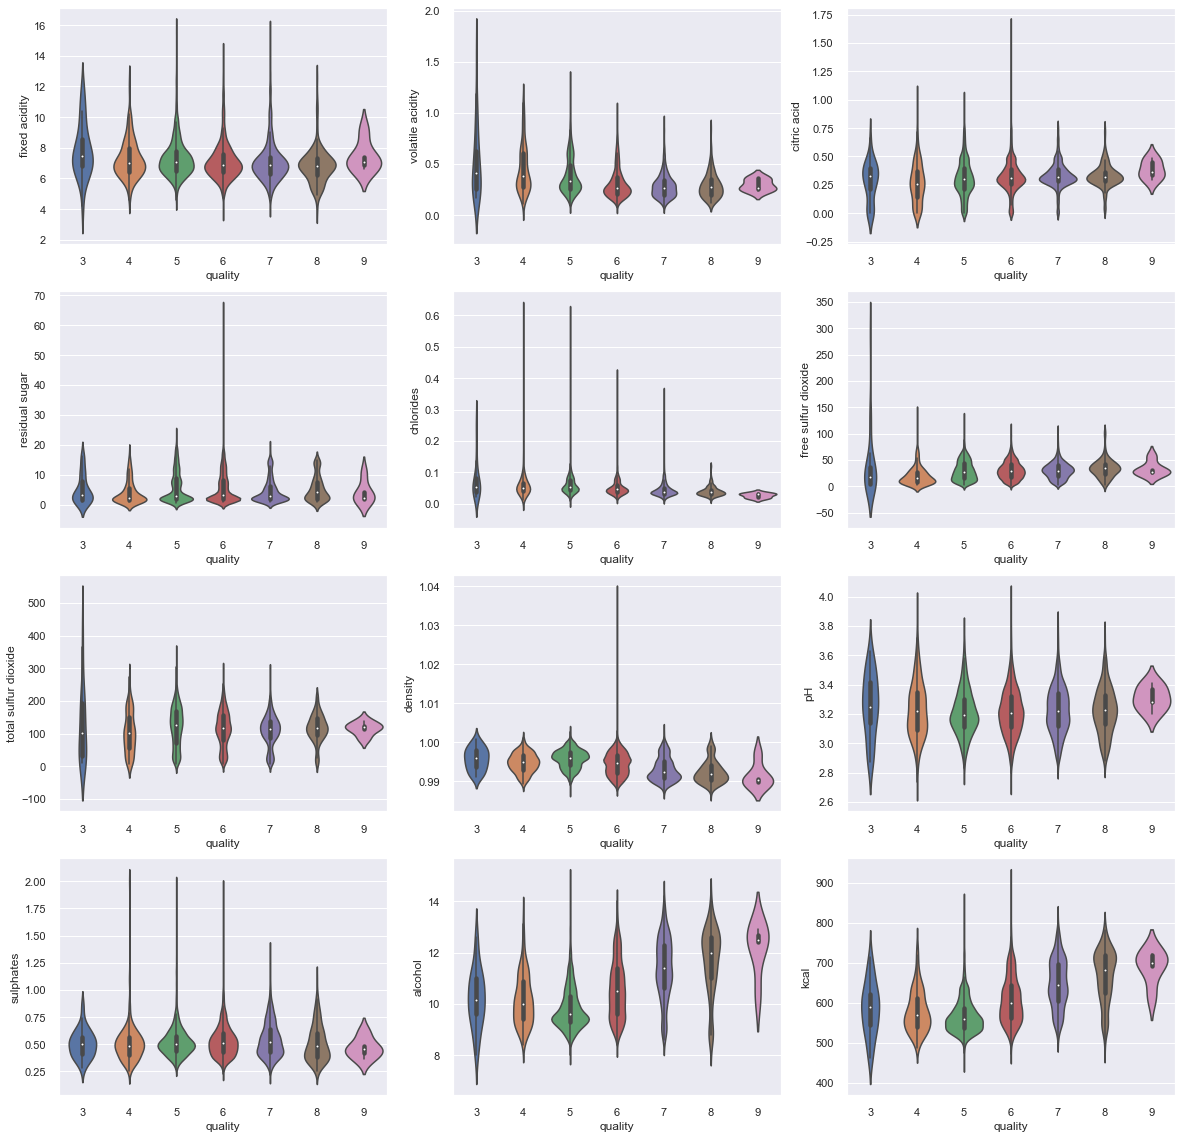

In [77]:
#lets see whether our data has outliers or not:

# create box plots
cols = 3
rows = 4
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))

subset_columns = df_wines.loc[:, df_wines.columns != 'quality'].select_dtypes(np.number).columns

counter=0
for i in range(rows):
    for j in range(cols):
        sns.violinplot(x='quality', y=subset_columns[counter],data=df_wines, ax=ax[i][j])
        counter+=1
        if counter==len(subset_columns):
            break

## Machine Learning